In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import seaborn as sns
import missingno
from PIL import Image
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#readind csv file into pandas dataframe
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.head(10000)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011-08-26,CoffsHarbour,9.2,21.7,0.0,3.0,10.8,E,17.0,NNE,...,71.0,51.0,1025.4,1022.6,0.0,0.0,18.2,20.9,No,No
9996,2011-08-27,CoffsHarbour,12.0,17.4,0.2,3.4,0.7,ENE,30.0,NE,...,83.0,96.0,1022.6,1018.2,8.0,8.0,17.1,15.6,No,Yes
9997,2011-08-28,CoffsHarbour,12.2,20.9,25.0,0.6,10.7,SSW,35.0,SW,...,70.0,62.0,1019.7,1017.2,1.0,1.0,17.3,20.0,Yes,No
9998,2011-08-29,CoffsHarbour,11.1,22.7,0.0,2.4,9.6,SW,43.0,SE,...,54.0,79.0,1018.6,1016.0,5.0,7.0,19.8,20.3,No,Yes


In [4]:
del data['Date']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

## Changing Categorical data

In [6]:
## mapping every unique location with an unique integer
location_encoder = LabelEncoder()
data.loc[:,'Location'] = location_encoder.fit_transform(data['Location'])

In [7]:
#Fill nan values
data.loc[:,"WindGustDir"] = data['WindGustDir'].fillna("NONE")
data.loc[:,'WindDir9am'] = data['WindDir9am'].fillna("NONE")
data.loc[:,'WindDir3pm'] = data['WindDir3pm'].fillna("NONE")
## below NONE will count as a part of category

In [8]:
windgustdir_encoder = LabelEncoder()
data.loc[:,'WindGustDir'] = windgustdir_encoder.fit_transform(data['WindGustDir'])
data.loc[:,'WindDir9am'] = windgustdir_encoder.fit_transform(data['WindDir9am'])
data.loc[:,'WindDir3pm'] = windgustdir_encoder.fit_transform(data['WindDir3pm'])

In [9]:
RainToday_map = {
    'No' : 0,
    'Yes' : 1
}
data.loc[:,'RainToday'] = data['RainToday'].map(RainToday_map)
data.loc[:,'RainTomorrow'] = data['RainTomorrow'].map(RainToday_map)

<AxesSubplot:>

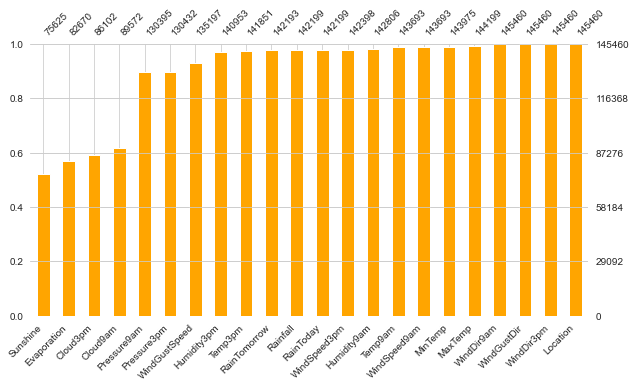

In [10]:
missingno.bar(data,figsize = (10,5),sort = 'ascending',color = 'orange',fontsize = 10)

<AxesSubplot:>

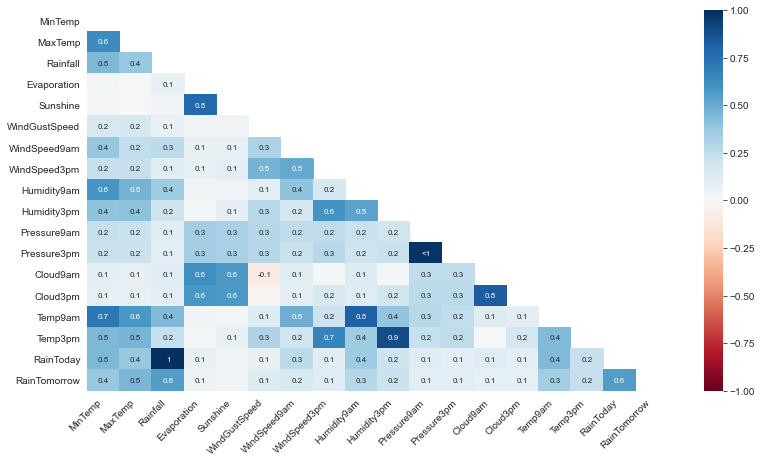

In [11]:
missingno.heatmap(data,figsize = (13,7),fontsize = 10)

In [12]:
df_pre1 = data.copy()

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(df_pre1.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
#knn_imputer = KNNImputer(n_neighbors = 3)
#output = knn_imputer.fit_transform(df_pre1) ## df_pr1 pandas DataFrame of our data
#X = np.round(output) ## rounding the fractional value to integer
#df_pre1 = pd.DataFrame(X, columns = df_pre1.columns) ## storing DataFrame back to df_pre_
#df_pre1.to_csv("data_clean.csv")

In [2]:
data_clean = pd.read_csv('data_clean.csv')
data_clean.reset_index(drop = True,inplace = True)

In [3]:
data_clean = np.array(data_clean)

In [4]:
X = data_clean[:,1 : 22]
Y = data_clean[:,22]

In [5]:
X.shape,Y.shape

((145460, 21), (145460,))

## Splitting data into test and train

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,train_size = 0.8)

In [7]:
scalling = StandardScaler()
X_train = scalling.fit_transform(X_train)
X_test = scalling.transform(X_test)

In [8]:
X_train.shape,X_test.shape

((116368, 21), (29092, 21))

## Logistic Classifier

In [21]:
first_clf = LogisticRegression()

In [23]:
grid = {'C' : [1,10,100,150,1000,1500],
       'max_iter' : [100,200,300,400,500,600]}
abc = GridSearchCV(first_clf, grid)
abc.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 150, 1000, 1500],
                         'max_iter': [100, 200, 300, 400, 500, 600]})

In [24]:
abc.best_estimator_

LogisticRegression(C=10)

In [25]:
abc.score(X_train,Y_train)

0.8442613089509143

In [ ]:
first_clf.score(X_test,Y_test)

In [26]:
pred = abc.predict(X_test)

array([[21349,  1255],
       [ 3285,  3203]], dtype=int64)

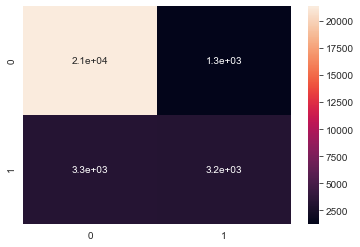

In [27]:
a = confusion_matrix(Y_test,pred)
sns.heatmap(a,annot = True)
a

## knn classifier

In [18]:
sec_clf =  KNeighborsClassifier()

In [32]:
grid = {'n_neighbors' : [20],'weights' : ['distance','uniform']}
abc = GridSearchCV(sec_clf, grid)
abc.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20],
                         'weights': ['distance', 'uniform']})

In [34]:
abc.score(X_train,Y_train)

1.0

In [35]:
abc.score(X_test,Y_test)

0.843152756771621

In [33]:
abc.best_estimator_

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [36]:
abc.cv_results_

{'mean_fit_time': array([5.33841448, 5.08261099]),
 'std_fit_time': array([1.46697494, 1.43555572]),
 'mean_score_time': array([80.83959069, 81.20365801]),
 'std_score_time': array([4.18235108, 1.40772396]),
 'param_n_neighbors': masked_array(data=[20, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance', 'uniform'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 20, 'weights': 'distance'},
  {'n_neighbors': 20, 'weights': 'uniform'}],
 'split0_test_score': array([0.84201255, 0.84055169]),
 'split1_test_score': array([0.84510613, 0.84274297]),
 'split2_test_score': array([0.84643809, 0.84575062]),
 'split3_test_score': array([0.84204873, 0.83968547]),
 'split4_test_score': array([0.84741976, 0.84471276]),
 'mean_test_score': array([0.84460505, 0.8426887 ]),
 'std_test_score': array([0.00222664, 0.00232643]),
 'rank_test_score': array

In [ ]:
a = confusion_matrix(Y_test,pred)
sns.heatmap(a,annot = True)
a

## Random forest Classifier

In [37]:
third_clf = RandomForestClassifier()

In [43]:
grid = {'n_estimators' : [100,200,300],'criterion' :['gini', 'entropy'],'max_depth':[10,12,15,17],'max_features' : ['sqrt','log2']}
randomForest = GridSearchCV(third_clf, grid)
randomForest.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [44]:
randomForest.best_estimator_

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=300)

In [45]:
randomForest.score(X_test,Y_test)

0.8530180118245566

In [46]:
randomForest.score(X_train,Y_train)

0.9597397910078372

In [47]:
Y_pred = randomForest.predict(X_test)

array([[21632,   972],
       [ 3304,  3184]], dtype=int64)

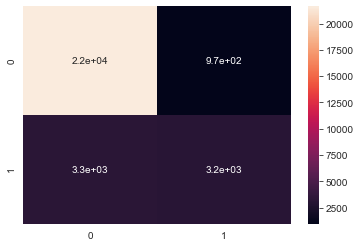

In [48]:
a = confusion_matrix(Y_test,Y_pred)
sns.heatmap(a,annot = True)
a

## SVM

In [ ]:
clf = svm.SVC()
grid = {'C': [1e2,1e3],
       'gamma': [1e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, Y_train)
abc.best_estimator_

In [ ]:
abc.score(X_train,Y_train)

In [ ]:
abc.score(X_test,Y_test)